## Ridge (L2) Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings

filterwarnings('ignore')

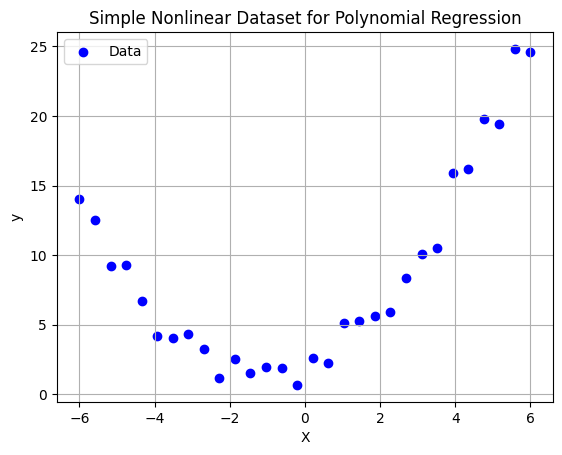

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic nonlinear data (quadratic pattern + noise)
np.random.seed(4)
X = np.linspace(-6, 6, 30)
y = 0.5 * X**2 + X + 2 + np.random.normal(0, 1, len(X))  # y = 0.5x² + x + 2 + noise

# Visualize
plt.scatter(X, y, color='blue', label='Data')
plt.title("Simple Nonlinear Dataset for Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

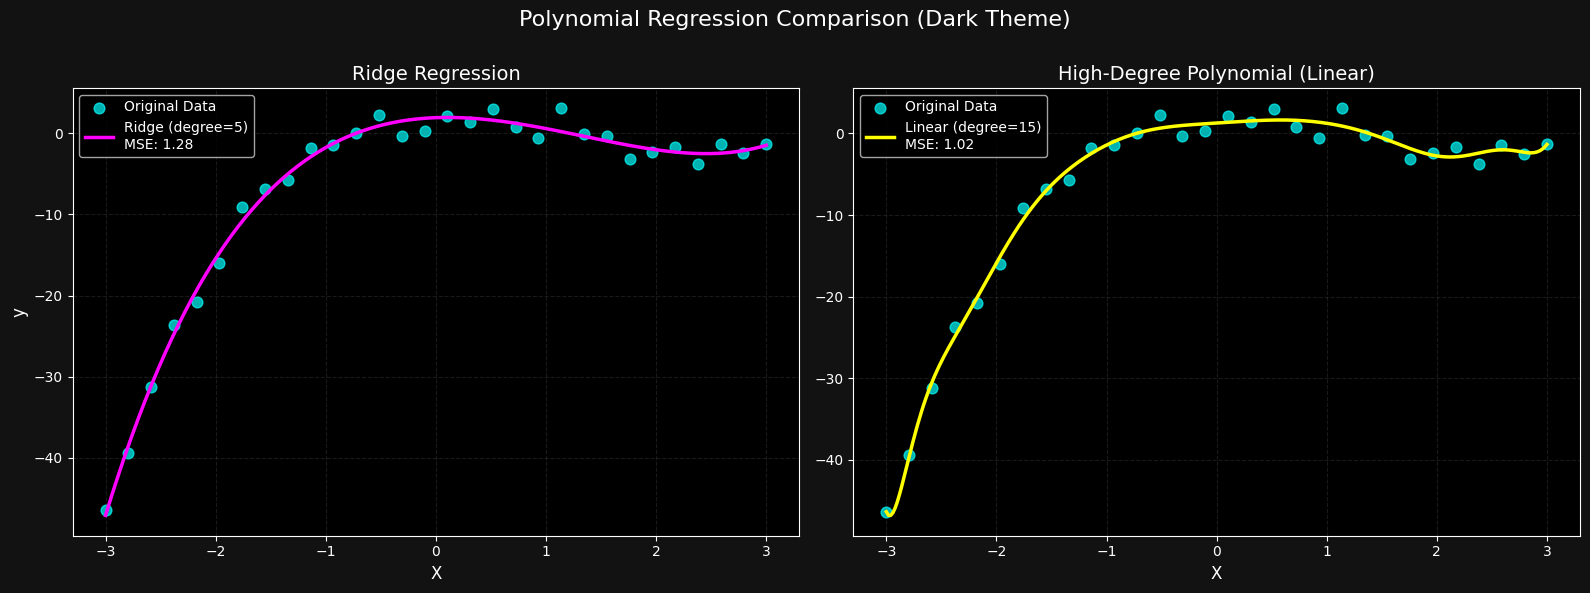

In [3]:
# Set dark theme
plt.style.use('dark_background')

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 30)
y = 0.8 * X**3 - 3 * X**2 + 0.5 * X + 3 + np.random.normal(0, 1.5, len(X))
X_reshaped = X.reshape(-1, 1)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), facecolor='#121212')
fig.suptitle('Polynomial Regression Comparison (Dark Theme)', fontsize=16, color='white')

# First plot: Ridge Regression
degree = 5
model_ridge = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', Ridge(alpha=0.1))
])
model_ridge.fit(X_reshaped, y)
mse_ridge = mean_squared_error(y, model_ridge.predict(X_reshaped))

# Smooth curve for Ridge
X_smooth = np.linspace(-3, 3, 300).reshape(-1, 1)
y_smooth_ridge = model_ridge.predict(X_smooth)

ax1.scatter(X, y, color='cyan', label='Original Data', marker='o', s=60, alpha=0.7)
ax1.plot(X_smooth, y_smooth_ridge, 'magenta', linewidth=2.5, 
        label=f'Ridge (degree={degree})\nMSE: {mse_ridge:.2f}')
ax1.set_title("Ridge Regression", fontsize=14)
ax1.set_xlabel("X", fontsize=12)
ax1.set_ylabel("y", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.2, color='gray')
ax1.legend(fontsize=10)

# Second plot: Linear Regression (High Degree)
degree = 15
model_lin = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])
model_lin.fit(X_reshaped, y)
mse_lin = mean_squared_error(y, model_lin.predict(X_reshaped))

# Smooth curve for Linear
y_smooth_lin = model_lin.predict(X_smooth)

ax2.scatter(X, y, color='cyan', label='Original Data', marker='o', s=60, alpha=0.7)
ax2.plot(X_smooth, y_smooth_lin, 'yellow', linewidth=2.5, 
        label=f'Linear (degree={degree})\nMSE: {mse_lin:.2f}')
ax2.set_title("High-Degree Polynomial (Linear)", fontsize=14)
ax2.set_xlabel("X", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.2, color='gray')
ax2.legend(fontsize=10)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust title position
plt.show()

### Building a ridge regreession from scratch 

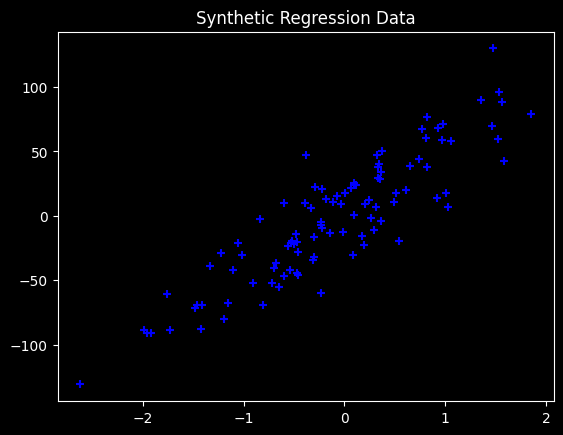

In [4]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

X, y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=25, random_state=42)
plt.scatter(X, y, color='blue', marker="+", label='Data')
plt.title("Synthetic Regression Data")
plt.show()

In [5]:
lr = LinearRegression()
lr.fit(X, y)
print(f"Linear Regression Coefficients: {lr.coef_}")
print(f"Linear Regression Intercept: {lr.intercept_}")
print(f"Linear Regression Score: {lr.score(X, y)}")

Linear Regression Coefficients: [48.48127451]
Linear Regression Intercept: 2.9127883013174323
Linear Regression Score: 0.797326591164067


In [6]:
rdg = Ridge(alpha=10.0)
rdg.fit(X, y)
print(f"Ridge Regression Coefficients: {rdg.coef_}")    
print(f"Ridge Regression Intercept: {rdg.intercept_}")
print(f"Ridge Regression Score: {rdg.score(X, y)}")

Ridge Regression Coefficients: [43.19157451]
Ridge Regression Intercept: 2.3634713785343644
Ridge Regression Score: 0.7878347540804558


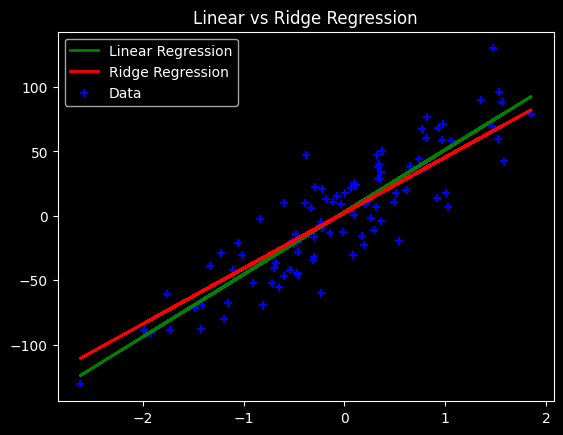

In [7]:
# Plot both the lines in a same graph
plt.plot(X, lr.predict(X), color='green', label='Linear Regression', linewidth=2)
plt.plot(X, rdg.predict(X), color='red', label='Ridge Regression', linewidth=2)
plt.scatter(X, y, color='blue', marker="+", label='Data')
plt.title("Linear vs Ridge Regression")

plt.legend()
plt.show()

In [8]:
class Own_ridge:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        num = 0 
        den = 0
        for i in range(len(X_train)):
            num += (y_train[i] - np.mean(y_train)) * (X_train[i] - np.mean(X_train))
            den += (X_train[i] - np.mean(X_train)) * (X_train[i] - np.mean(X_train)) 
        
        self.coef_ = num / (den + self.alpha)
        self.intercept_ = np.mean(y_train) - self.coef_ * np.mean(X_train)
        print(f"Coefficient: {self.coef_}, Intercept: {self.intercept_}")

    def predict(self, X_test):
        return X.dot(self.coef_) + self.intercept_
    
own_rdg = Own_ridge(alpha=10.0)
own_rdg.fit(X, y)

Coefficient: [43.19157451], Intercept: [2.36347138]


### Ridge Regression for multidimensional columns 

In [9]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

In [10]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = Ridge(alpha=1.0, solver='cholesky')
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.4192


In [11]:
print(reg.coef_)
print(reg.intercept_)

[  45.36737726  -76.66608563  291.33883165  198.99581745   -0.53030959
  -28.57704987 -144.51190505  119.26006559  230.22160832  112.14983004]
152.241675211113


In [12]:
class Own_multi_rdg :
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis = 1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0  # Do not regularize the intercept term
        
        result = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        
        self.intercept_ = result[0]
        self.coef_ = result[1:]

    def predict(self, X_test):
        return X_test.dot(self.coef_) + self.intercept_
    
own_multi_rdg = Own_multi_rdg(alpha=1.0)
own_multi_rdg.fit(X_train, y_train)
y_pred = own_multi_rdg.predict(X_test)

print(f"R-squared (Own Implementation): {r2_score(y_test, y_pred):.4f}")
print("Coefficients (Own Implementation):", own_multi_rdg.coef_)
print("Intercept (Own Implementation):", own_multi_rdg.intercept_)

R-squared (Own Implementation): 0.4192
Coefficients (Own Implementation): [  45.36737726  -76.66608563  291.33883165  198.99581745   -0.53030959
  -28.57704987 -144.51190505  119.26006559  230.22160832  112.14983004]
Intercept (Own Implementation): 152.24167521111292


### Regularization using the Gradient Descent

In [41]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import numpy as np

X, y = load_diabetes(return_X_y=True)

In [42]:
# Check for NaN values
print("NaN values in X:", np.isnan(X).sum())
print("NaN values in y:", np.isnan(y).sum())

# If there are NaN values, handle them (though diabetes dataset should be clean)
if np.isnan(X).sum() > 0 or np.isnan(y).sum() > 0:
    # Convert to DataFrame to use dropna if needed, or use numpy methods
    X = np.nan_to_num(X)  # Replace NaN with 0 and inf with large numbers
    y = np.nan_to_num(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NaN values in X: 0
NaN values in y: 0


In [43]:
from sklearn.linear_model import SGDRegressor
sgd_rdg = SGDRegressor(penalty='l2', alpha=0.0001, max_iter=500, tol=1e-3, learning_rate='constant', eta0=0.01, random_state=42)

sgd_rdg.fit(X_train, y_train)
y_pred = sgd_rdg.predict(X_test)

print(f"R-squared (SGD Implementation): {r2_score(y_test, y_pred):.4f}")
print("Coefficients (SGD Implementation):", sgd_rdg.coef_)
print("Intercept (SGD Implementation):", sgd_rdg.intercept_)

R-squared (SGD Implementation): 0.4408
Coefficients (SGD Implementation): [  58.28970954  -79.58016775  340.01094888  236.90759423    7.25371506
  -26.80872891 -174.99835524  146.97405679  271.32101614  146.07321141]
Intercept (SGD Implementation): [150.18905285]


In [44]:
# Creating a  custom Ridge regression using SGD
class MeraRidgeGD:
    
    def __init__(self,epochs,learning_rate,alpha):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_


own_sgd_rdg = MeraRidgeGD(epochs=1000, learning_rate=0.01, alpha=0.1)
own_sgd_rdg.fit(X_train, y_train)

In [ ]:
y_pred = own_sgd_rdg.predict(X_test)

print(f"R-squared (Own Implementation): {r2_score(y_test, y_pred):.4f}")
print("Coefficients (Own Implementation):", own_sgd_rdg.coef_)
print("Intercept (Own Implementation):", own_sgd_rdg.intercept_)

## Lasso Regularization

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[28.23145971]
-1.4578302325524108


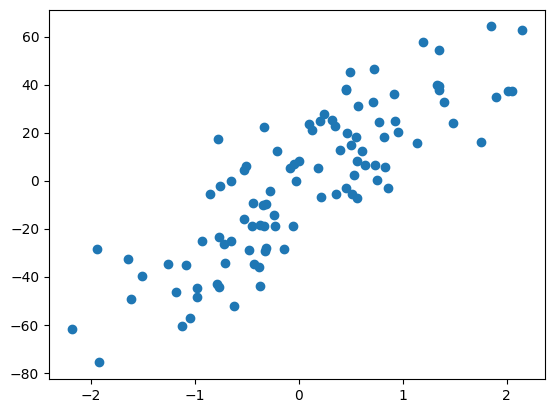

In [17]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

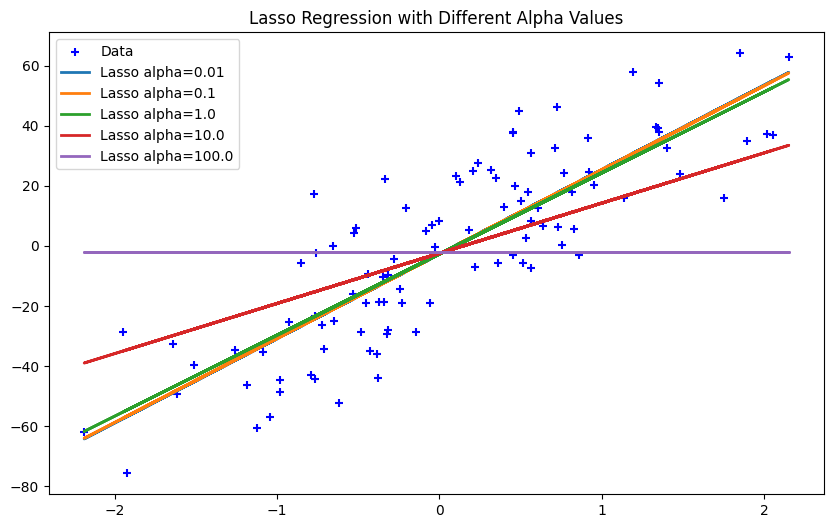

In [20]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', marker="+", label='Data')
for i in [0.01, 0.1, 1.0, 10.0, 100.0]:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    plt.plot(X_train, lasso.predict(X_train), label=f'Lasso alpha={i}', linewidth=2)
    
plt.legend()
plt.title("Lasso Regression with Different Alpha Values")
plt.show()

1. How does the coeffiecents are affected 

In [21]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42) 
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))


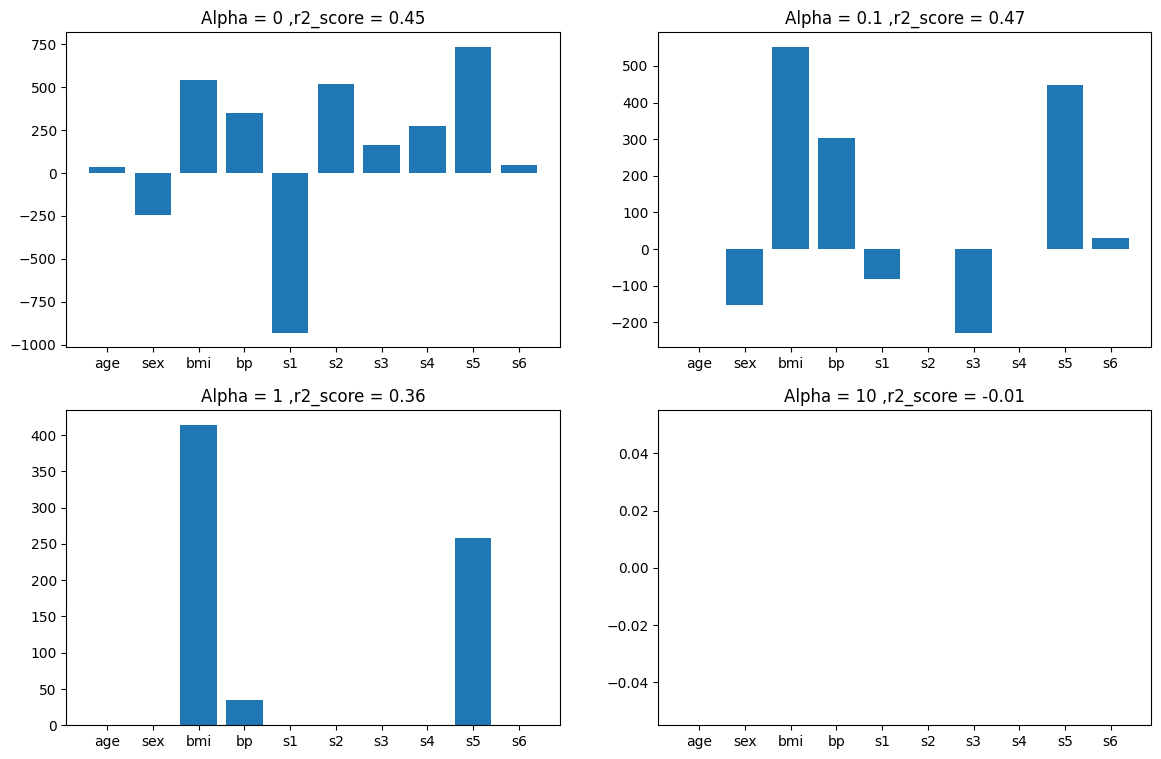

In [25]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

2. Impact on bias and variance on increasign the lambda

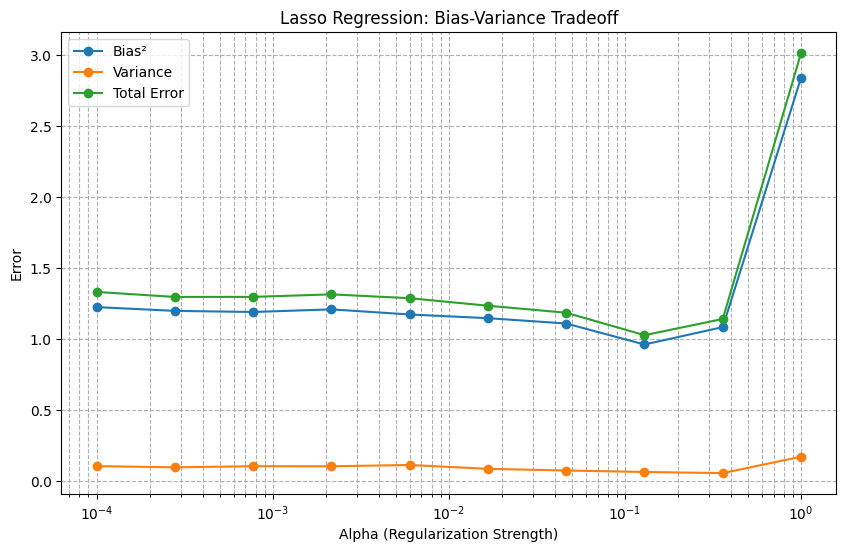

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Generate a dataset with 100 samples and 10 features
np.random.seed(0)
X = np.random.normal(0, 1, (100, 10))
# Create y based on only the first two features, making the others irrelevant
y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.normal(0, 1, 100)

# Define the Lasso regression model with varying alpha values
alpha_values = np.logspace(-4, 0, 10) # [1e-4, 1e-3, ..., 1]

# We'll use a fixed test set to evaluate all models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bootstrap parameters
n_bootstraps = 100
bias_squared_values = []
variance_values = []

for alpha in alpha_values:
    model = Lasso(alpha=alpha, max_iter=10000)
    y_preds = [] # Store predictions for each bootstrap iteration
    
    for _ in range(n_bootstraps):
        # Create a bootstrap sample
        X_boot, y_boot = resample(X_train, y_train, random_state=np.random.randint(0, 10000))
        # Fit the model on the bootstrap sample
        model.fit(X_boot, y_boot)
        # Predict on the fixed test set
        y_pred = model.predict(X_test)
        y_preds.append(y_pred)
    
    # Convert list of predictions to a 2D array: [n_bootstraps, n_test_samples]
    y_preds = np.array(y_preds)
    
    # Calculate the expected prediction for each test point (average over bootstraps)
    expected_pred = np.mean(y_preds, axis=0)
    
    # Calculate Bias²: (expected prediction - true value)², then average over test points
    bias_squared = np.mean((expected_pred - y_test) ** 2)
    
    # Calculate Variance: mean of the variance of the predictions for each test point
    variance = np.mean(np.var(y_preds, axis=0))
    
    bias_squared_values.append(bias_squared)
    variance_values.append(variance)

# Calculate total error (approximately Bias² + Variance + Irreducible Error)
total_error = np.array(bias_squared_values) + np.array(variance_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, bias_squared_values, 'o-', label='Bias²')
plt.plot(alpha_values, variance_values, 'o-', label='Variance')
plt.plot(alpha_values, total_error, 'o-', label='Total Error')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Error')
plt.title('Lasso Regression: Bias-Variance Tradeoff')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()